# Exploratory Data Analysis  — Disney Movies

Disney movies made a part of my childhood and I really have a special affection for Disney. So, I made this EDA analysis (Exploratory Data Analysis) using Python language to explory a dataframe of some Disney Films. I hope you enjoy and learn it!

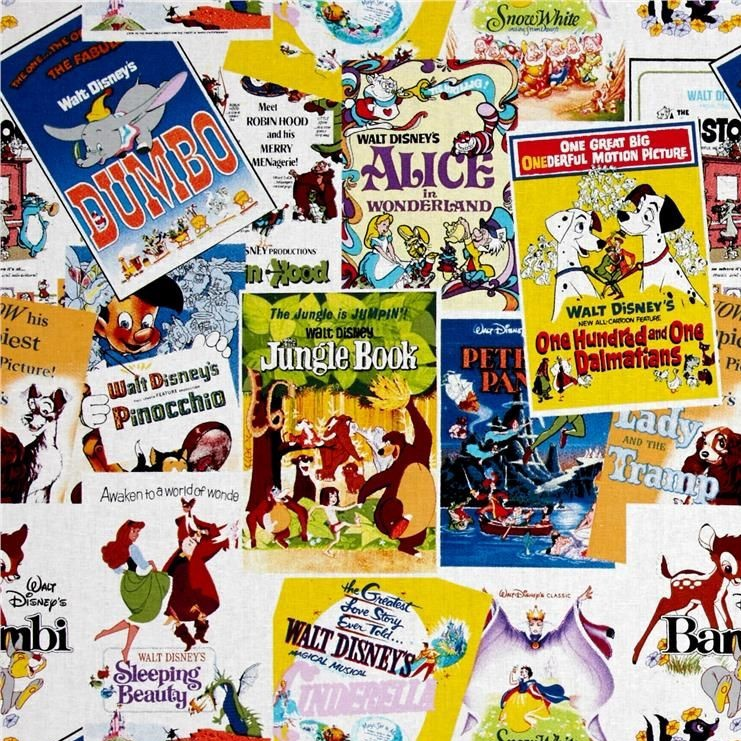

### The objective of this analysis:
This dataframe contains informartions about the release, movie title, genre, mpaa rating, inflation adjusted gross and total gross about Disney films and I decided to analyse the correlactions from these variables and discovery if that correlations have some insight! And of course, I expect to try to help you to learn a bit more about data analysis!

First Step: Let’s explore the dataframe!
First of all, it’s so much import to have a know of the data. So, let’s analyze our data and have an overview!

### Importing libraries:

In [1]:
import numpy as np #library for calculations on Multidimensional Arrays
import pandas as pd #library for data manipulation
import missingno as msno #library for visualize the distribution of null values
import plotly #library for graph
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
from plotly.offline import iplot
import plotly.graph_objs as go
from pylab import rcParams #libary for customizing the properties and default styles of Matplotlib
import seaborn as sns #library for statistical data visualization
import matplotlib.pyplot as plt #library that provides a MATLAB-like way of plotting
sns.set(style="darkgrid")
import statistics as stat #library for statistical data visualization

### Uploading the dataframe:

In [2]:
df = pd.read_csv('disney_movies.csv')

In [3]:
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


Let’s separate the year from the column “release_date” in our dataframe:

In [4]:
df['year'] = pd.DatetimeIndex(df['release_date']).year
df.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,1940
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,1940
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,1946
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,1950


Now Let’s explore!

### Meeting the data!

Let’s analyze how much lines and columns have this dataframe:

In [5]:
print(df.shape)

(579, 7)


Seeing name of columns:

In [6]:
print(df.columns)

Index(['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross', 'year'],
      dtype='object')


Seeing data types and informations from dataframe:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
 6   year                      579 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 31.8+ KB


Seeing stats about the dataframe:

In [8]:
df.describe()

,total_gross,inflation_adjusted_gross,year
count,5.790000e+02,5.790000e+02,579.000000
mean,6.470179e+07,1.187625e+08,1998.012090
std,9.301301e+07,2.860853e+08,11.410924
min,0.000000e+00,0.000000e+00,1937.000000
25%,1.278886e+07,2.274123e+07,1993.000000
50%,3.070245e+07,5.515978e+07,1998.000000
75%,7.570903e+07,1.192020e+08,2006.000000
max,9.366622e+08,5.228953e+09,2016.000000


### Treatment and Cleaning

80% of the data scientist’s time is processing data!

### Why should we treat data?

In order to perform a data analysis, the treatment and cleaning is essential for the effectiveness of the result of your model / algorithm. If the data is inconsistent, the result of the analysis may become skewed or wrong, with no safe results.

### Analytical data view:

It is worth mentioning that, when it comes to an operation, the data has an individual value and cannot be changed. When it comes to the analytical, the data does not have an individual value but as a whole, because it is a model, a joint analysis of these data to bring us value to this set of information. And that is where the data treatment comes in!

### Analyzing the null values:
In many situations, the null value can help to find a important information or can disturb your analysis too…by the way, doesn’t exists an rule telling us that the null vales are really the villans!

Depends what you are looking for!

<AxesSubplot:>

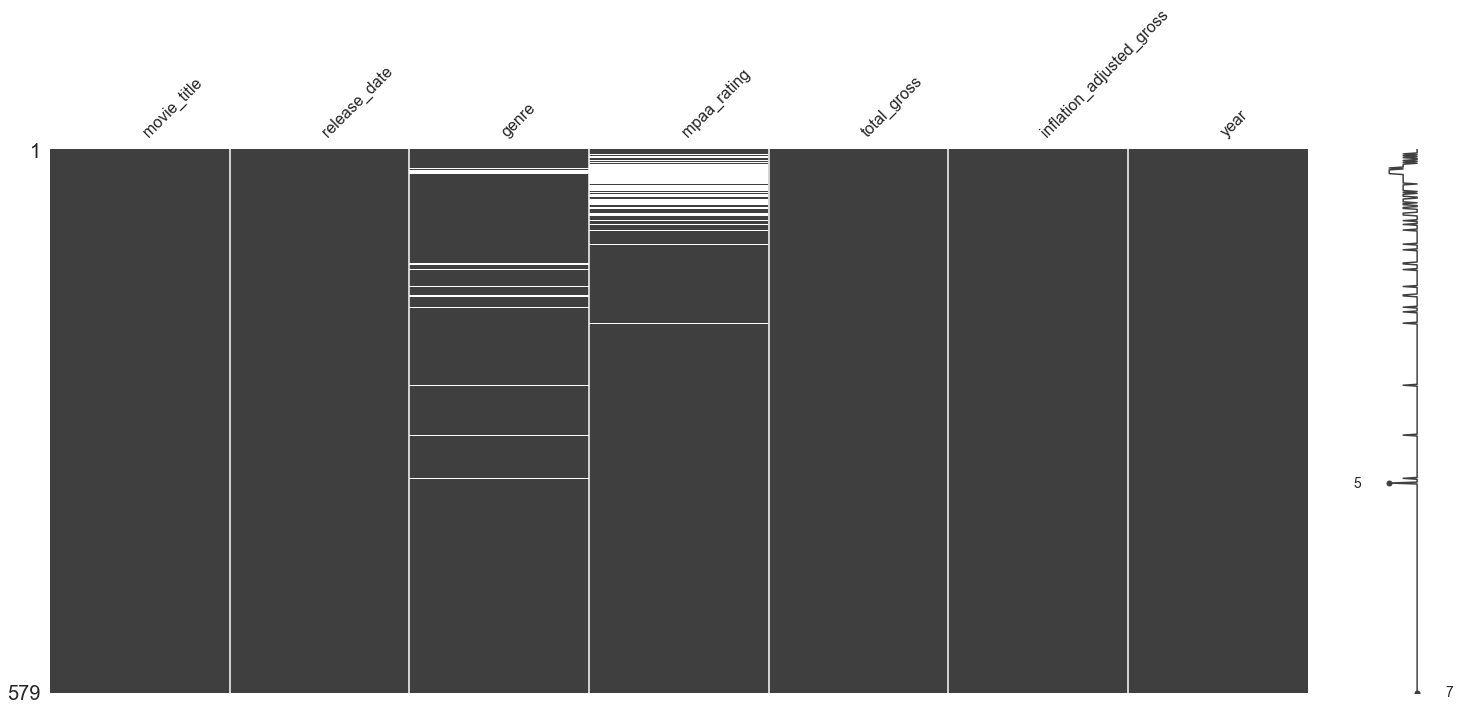

In [9]:
msno.matrix(df)

In that graphy we can analyze that have some null values in genre and mpaa_rating columns.


Summing the null columns in the dataframe:

In [10]:
df.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
year                         0
dtype: int64

##### But, we need to clean those null values? Let’s analyze!
First, let’s create a dataframe with those null values:

In [11]:
df_null_genre = df[df['genre'].isnull()]
df_null_genre.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,0,0,1977
22,Herbie Goes to Monte Carlo,1977-06-24,NaN,NaN,28000000,105847527,1977
23,The Black Hole,1979-12-21,NaN,NaN,35841901,120377374,1979
24,Midnight Madness,1980-02-08,NaN,NaN,2900000,9088096,1980
25,The Last Flight of Noah’s Ark,1980-06-25,NaN,NaN,11000000,34472116,1980


Analyzing name of movies with null genre:

In [12]:
df_null_genre.movie_title

20     The Many Adventures of Winnie the Pooh
22                 Herbie Goes to Monte Carlo
23                             The Black Hole
24                           Midnight Madness
25              The Last Flight of Noah’s Ark
26                   The Devil and Max Devlin
121                                   Newsies
122                               Passed Away
128              A Gun in Betty Lou's Handbag
146                            Bound by Honor
155                       My Boyfriend's Back
156                               Father Hood
168                             Red Rock West
251                           The War at Home
304                                 Endurance
350                  High Heels and Low Lifes
355                       Frank McKlusky C.I.
Name: movie_title, dtype: object

Note: In this case, if we take out those null values we’ll lost this movies (lost data!)…so I won’t take off this movies.

Let’s do the same analysis to the mpaa_rating column:

In [13]:
df_null_mpaa_rating= df[df['mpaa_rating'].isnull()]
df_null_mpaa_rating.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
5,"20,000 Leagues Under the Sea",1954-12-23,Adventure,NaN,28200000,528279994,1954
7,Sleeping Beauty,1959-01-29,Drama,NaN,9464608,21505832,1959
9,The Absent Minded Professor,1961-03-16,Comedy,NaN,25381407,310094574,1961
12,The Sword in the Stone,1963-12-25,Adventure,NaN,22182353,153870834,1963
14,Blackbeard's Ghost,1968-02-08,Comedy,NaN,21540050,138612686,1968


Note: The mpaa rating is it not a very relevant variable to our analysis, so I decided to left the data the way is it.

### Giving importance to the variables!

In this case we don’t have any null categoric variable that could impact in our analysis, so I’ll keep it all the null values. It is very important to know how to categorize the variables that are important and impacting for our analysis.

Do you know what you are doing?

Exists good pratices to treat the data but doesn’t exists a magic formula to treat the dataframe in the “right way”, its depends a lot of situations and scenarios and especially what we expect from these datas. Its necessary to have know the objective of the analysis, what I want and what information I need to extract from this group of data…keep in mind!

### Analyzing if there is any duplicate value

In [14]:
df.duplicated().sum()

0

We can see that the dataframe have none duplicate value. It’s too much important to validate that because a duplicate value can skewed the analysis.

### Here comes the variables analysis!


In this dataframe exists two types of variables: numeric and categorical. Let’s explore both of them!

### Analyzing the categorical variables:
Analyzing the variable Genre:

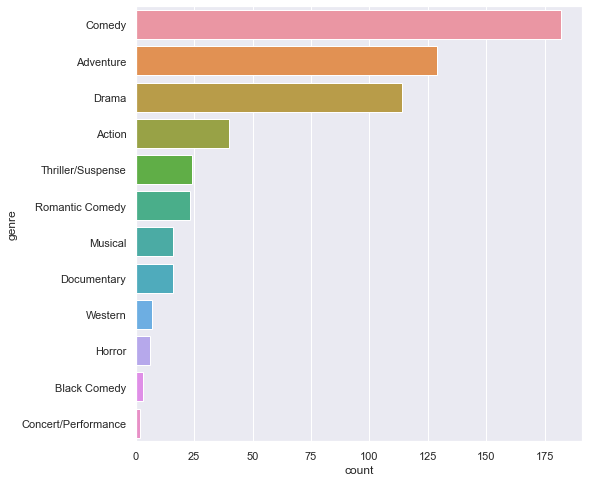

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(y='genre', data=df, order=df["genre"].value_counts().index)
plt.show()


As we can see, the biggest genre from this dataframe is Comedy .

### Analyzing the Motion Picture Association film rating:

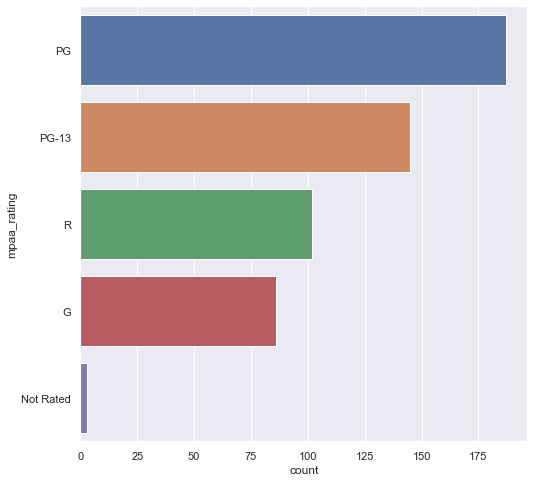

In [16]:
plt.figure(figsize=(8,8))
sns.countplot(y='mpaa_rating', data=df, order=df["mpaa_rating"].value_counts().index)
plt.show()

Well, as we can see the “PG” mpaa rating is in the almost of Disney movies.

### Analyzing the numeric variables:
Analyzing the relationship between genre vs. grossing:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

89.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

92.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\ProgramData\Anaconda3\lib\site-packag

Text(0.5, 1.0, 'Relationship between Genre & total_gross')

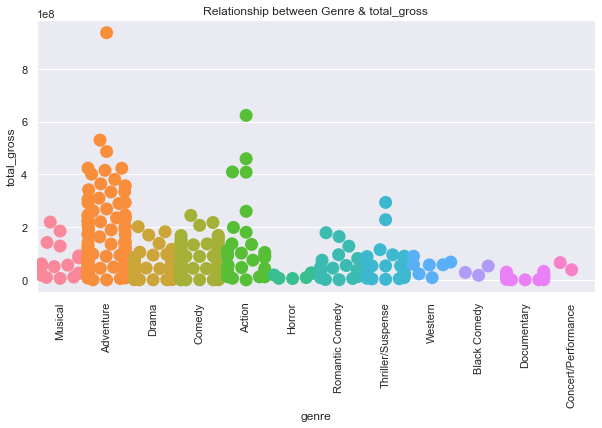

In [17]:
plt.figure(figsize=(10,5))
swarmplot=sns.swarmplot(x="genre",y="total_gross",data=df, s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between Genre & total_gross")

Analyzing the relationship between genre and total grossing we can see that the highest grossing Disney movie is correlationated by Adventure Movies.

### Analyzing the distribution of the total grossing:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'total_gross')

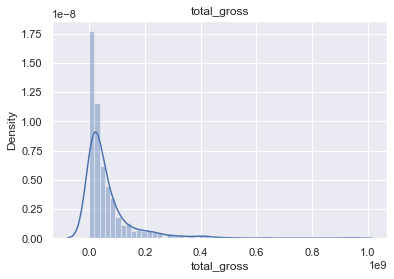

In [18]:
sns.distplot(df['total_gross']).set_title('total_gross')

First let’s see how the boxplot works!

A boxplot graph is a standardized way of displaying the distribution of data. If you want to know more than about the measures of central tendency (median, mean, and mode), boxplot can help you! The boxplot show the indication of how the values in the data are spread out, showing you the measures of central tendency, the Q1, Q3, minimum, maximum, and even outliers!

Look at the boxplot, we can see that the distribution of grossing movies is concentred between 12.00000 and 75.00000 and we have a minimum 0 and a maximum 169.00000. These data after the maximum value are the outliers and problaly could be the biggest gross movies from Disney! The outlier 936.6622 is the most biggest gross between the years 1940 and 2016! Let’s see whos is that movie:

In [19]:
df[(df['total_gross'] > 900000000)]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225,2015


You see? Outliers are not bad at all the time! Sometimes could be a important information for your analysis. If we took the outliers off, we could lost those informations.
Looking at the boxplot graph and the stats from the dataframe, for the total_gross variable there is a zero value as a minimum. This seems to be a wrong information! I bet that any Disney films hasn’t zero grossing! Let’s see those data

In [20]:
df[(df['total_gross'] == 0)]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,0,0,1977
27,Amy,1981-03-20,Drama,NaN,0,0,1981
29,Condorman,1981-08-07,Action,NaN,0,0,1981
355,Frank McKlusky C.I.,2002-01-01,NaN,NaN,0,0,2002


As you can see, these data are inconsistent.

To fix these data, let’s replace those null values by the median value of total_gross variable.

In [21]:
df.total_gross.median()

30702446.0

In [22]:
df.loc[df['total_gross'] == 0, 'total_gross'] = 30702446

In [23]:
df[(df['total_gross']  == 0)]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year


Done! Data adjusted.

But, why you don’t drop those null grossing movies values?

Because we’ll lose those informations! Informations that can affect my analysis. As this is a numeric variable, for a more efficient result in my analysis, I can take these null values and replace it with another measure within this data set. So I take these inconsistents datas and replace for the median.

But why median and not the mean?

It’s depends!

In my analysis I choose median because I considere this mensure better in the type of results that I expect. The mean is influenced by all values in the sample, that is, if we have very different values, the average value is changed. The median is the value that is in the middle of the sample. That is, it divides the sample into two parts, where half is above and half below. In the total_gross variable have many outliers that can left my sample very skewed and I wont take off of these outliers of my dataframe, as I mensioned before.

Continuing to explore the boxplot, let’s see a boxplot of total gross variable per genre:

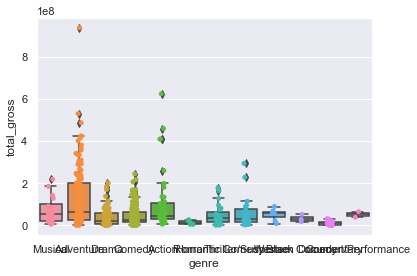

In [24]:
ax = sns.boxplot(x="genre", y="total_gross",
data=df)
ax = sns.stripplot(x="genre", y="total_gross",
data=df, jitter=True,
edgecolor="gray")
rcParams['figure.figsize'] = 40.5,25.5

This boxplot visualization per genre can show to us that the highest grossing in this dataframe belongs to Adventure genre.


Analyzing the distribution of inflation adjusted gross:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



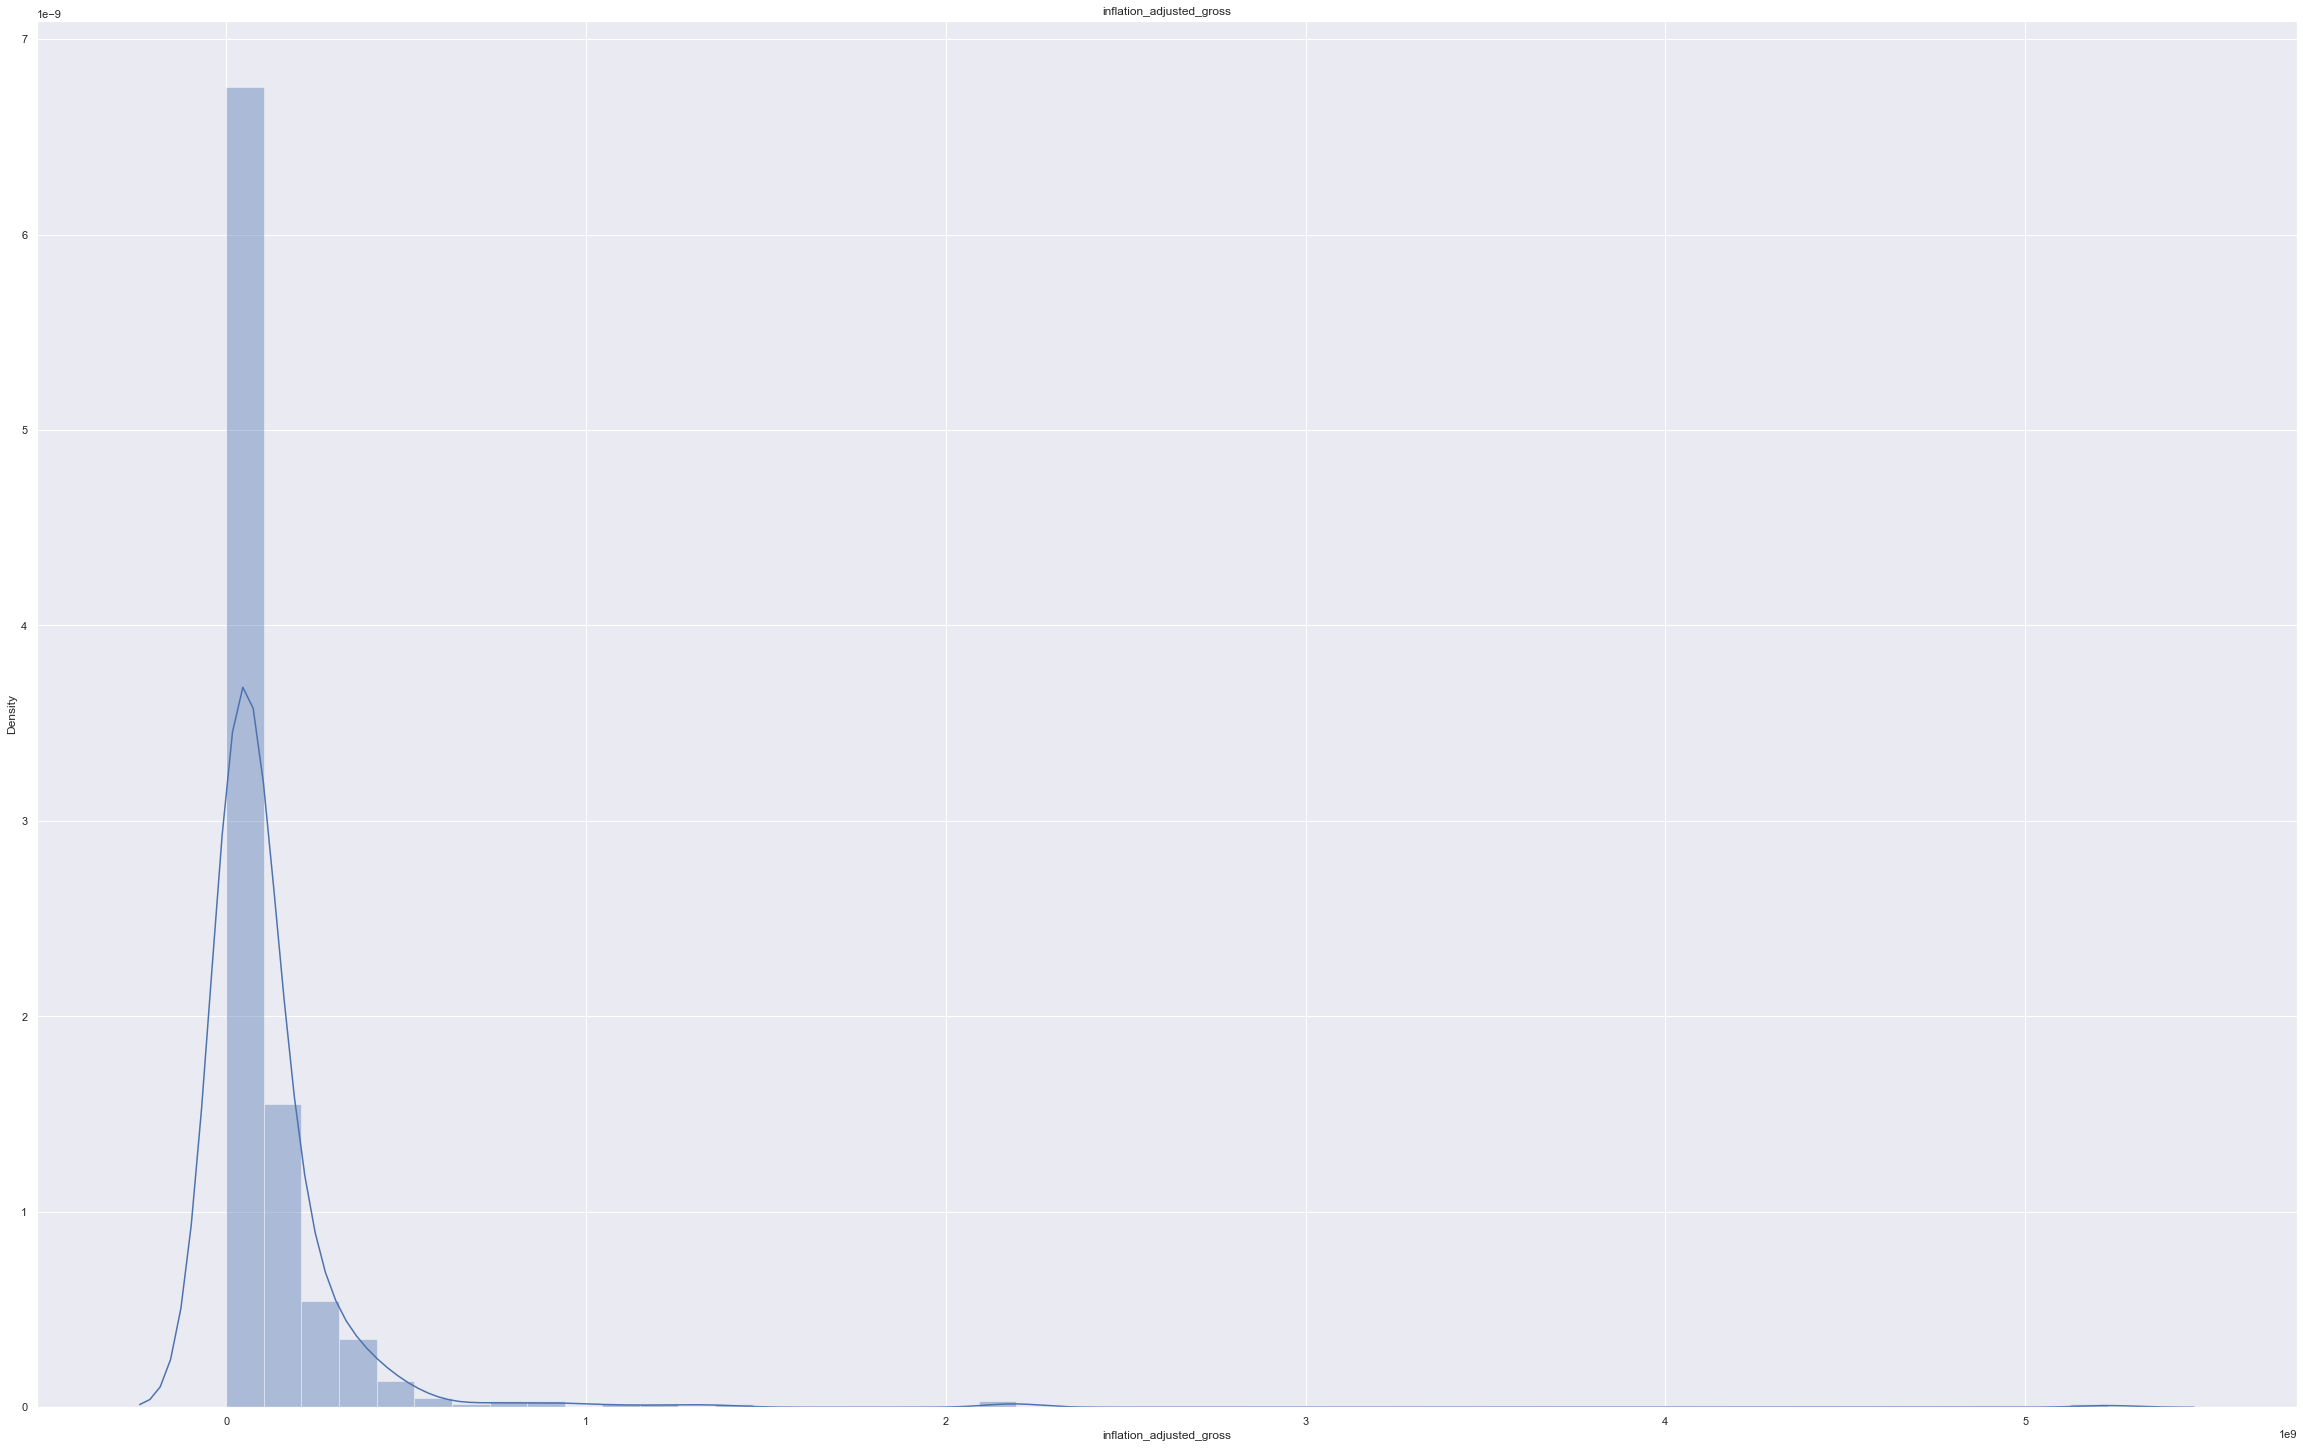

In [25]:
sns.distplot(df['inflation_adjusted_gross']).set_title('inflation_adjusted_gross')
sns.set(rc={'figure.figsize':(7,5)})

In [26]:
df[(df['inflation_adjusted_gross'] >= 5000000000)]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,1937


As you can see, Snow White and the Seven Dwarfs is the biggest inflation adjusted grossing movie!

Like total_gross variable, the variable inflation_adjusted_gross have zero value as a mininum too. Very strange don’t you think? Let’s see who are these films

In [27]:
df[(df['inflation_adjusted_gross'] == 0)]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,30702446,0,1977
27,Amy,1981-03-20,Drama,NaN,30702446,0,1981
29,Condorman,1981-08-07,Action,NaN,30702446,0,1981
355,Frank McKlusky C.I.,2002-01-01,NaN,NaN,30702446,0,2002


Let’s do the same step before done for the total_gross variable.

Replacing the null values by median

In [28]:
df.inflation_adjusted_gross.median()

55159783.0

In [29]:
df.loc[df['inflation_adjusted_gross'] == 0, 'inflation_adjusted_gross'] = 55159783

In [30]:
df[(df['inflation_adjusted_gross'] == 0)]

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year


Done! Data adjusted.

Seeing the boxplot with the distribution of inflation adjusted gross per genre, we can see that was a musical the highest movie grossing adjusted for inflation (Snow White and the Seven Dwarfs).

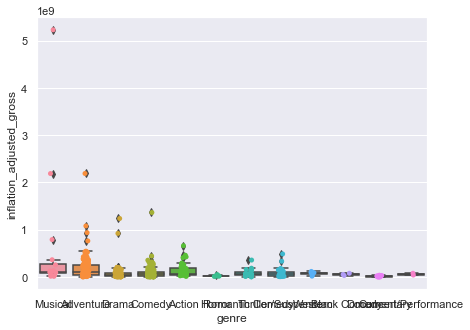

In [31]:
ax = sns.boxplot(x="genre", y="inflation_adjusted_gross",
data=df)
ax = sns.stripplot(x="genre", y="inflation_adjusted_gross",
data=df, jitter=True,
edgecolor="gray")
rcParams['figure.figsize'] = 50.5,40.5

Analyzing release year:

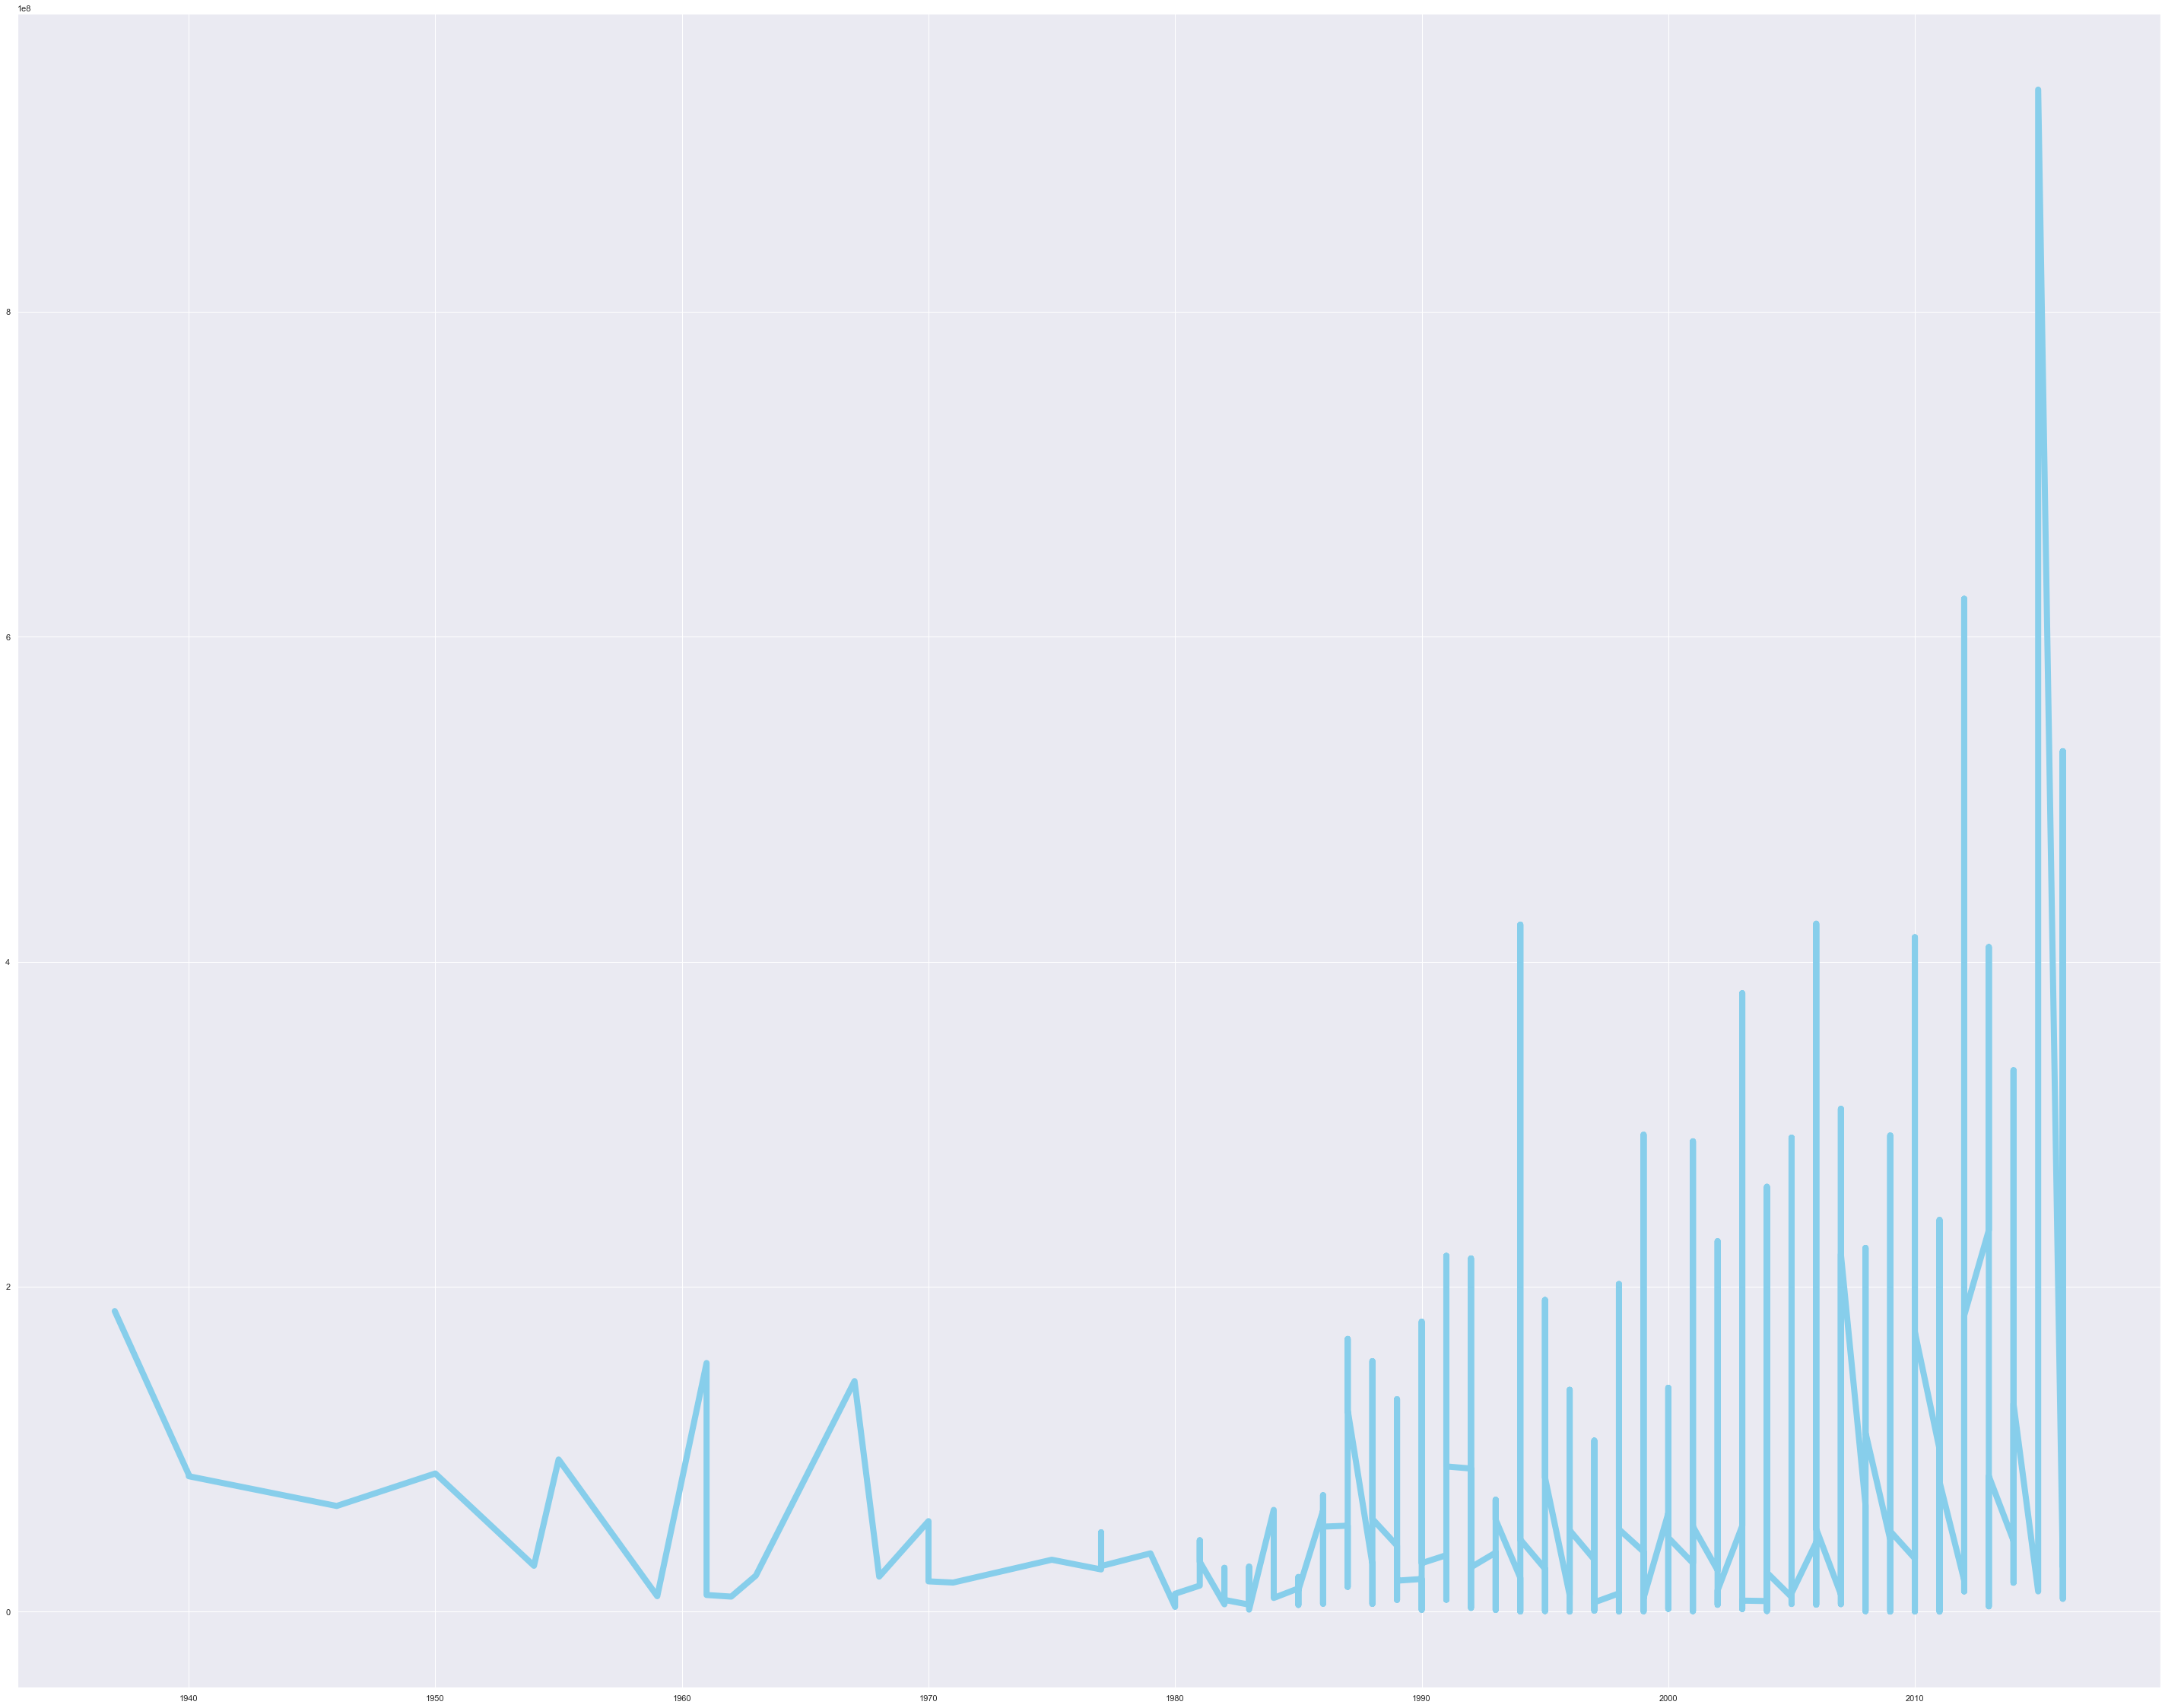

In [32]:
plt.plot( 'year', 'total_gross', data=df, linewidth=8, color='skyblue')
plt.show()

Here we can see that this dataframe contains Disney movies since the end of 1930’s until the middle of the 2010's.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\ProgramData\Anaconda3\lib\site-packag

Text(0.5, 1.0, 'Relationship between year & total_gross')

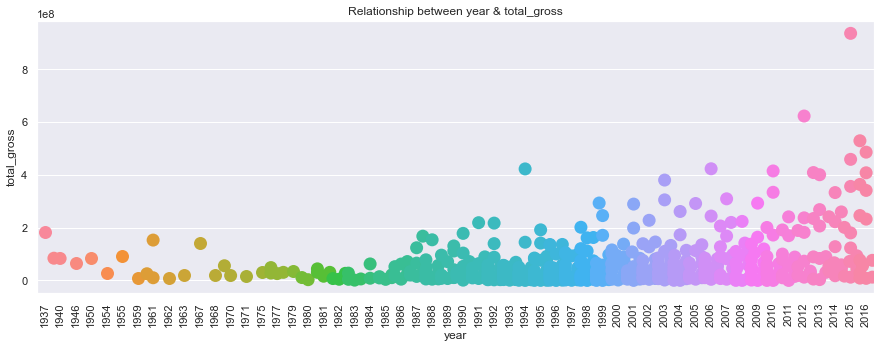

In [33]:
plt.figure(figsize=(15,5))
swarmplot=sns.swarmplot(x="year",y="total_gross",data=df, s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between year & total_gross")

In the 80’s the number of films productions started to grow. Analyzing the graph, we can see that the films begin to grow grossing in begin of 90’s. The 90’s was an important year, we can see that was in 1995 when Disney had their record highest-grossing since 1937. We can see that the decade with the highest-grossing is the 2010's.


Let’s use the pair plot to see both distribution of single variables and relationships between they:

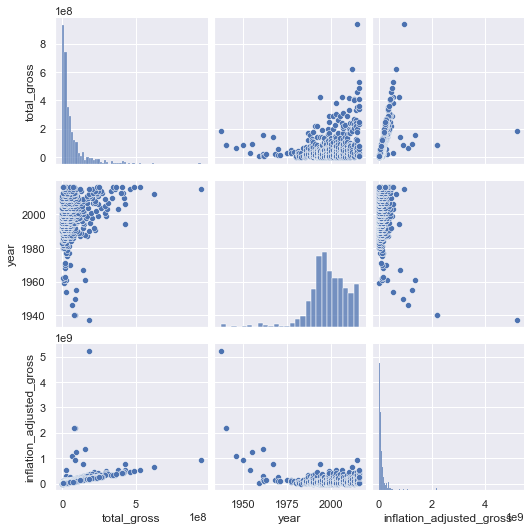

In [34]:
sns.pairplot(data = df, vars=['total_gross','year','inflation_adjusted_gross'])
plt.show()

This graph shows the relationship between two variables. We can see some correlations that we discovered before, look at the relationship between year and total gross or the relationship between year and inflation adjusted gross…


Now, let’s analyze what year have the biggest number of movies produced

Creating a new dataframe with the sum of movies per year:

In [35]:
df_Year = df.groupby(['year'], as_index=False).agg({"movie_title": "count"}).sort_values(by='movie_title', ascending=False)
df_Year.head()

,year,movie_title
32,1995,32
31,1994,30
33,1996,28
30,1993,27
34,1997,23


The year 1995 is the year with the biggest number of movies produced! 32 movies in one year! Let’s see the movies produced in this year

In [36]:
Movies_1995 = df[(df['year'] == 1995)]
Movies_1995.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
195,Houseguest,1995-01-06,Comedy,PG,26325256,51016522,1995
196,Bad Company,1995-01-20,Thriller/Suspense,R,3523909,6829092,1995
197,Miami Rhapsody,1995-01-27,Romantic Comedy,PG-13,5086578,9857435,1995
198,The Jerky Boys,1995-02-03,Comedy,R,7555256,14641561,1995
199,Heavy Weights,1995-02-17,Comedy,PG,17671310,34245779,1995


Analyzing the genres produced in this year:

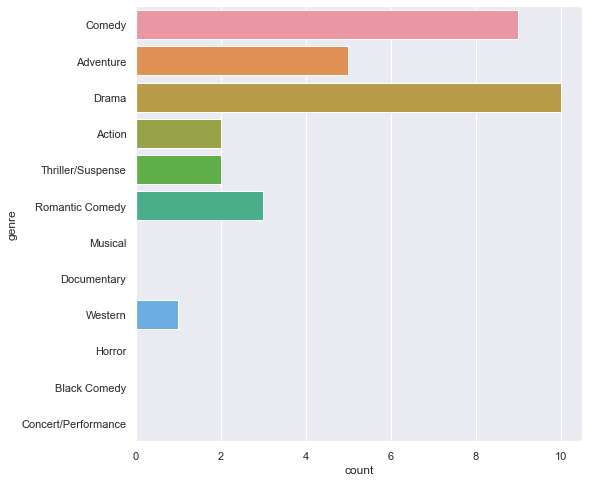

In [37]:
plt.figure(figsize=(8,8))
sns.countplot(y='genre', data=Movies_1995, order=df["genre"].value_counts().index)
plt.show()

Drama and Comedy was the genre more produced in this year.

Analyzing grossing movie vs movie in this year:

Text(0.5, 1.0, 'Relationship between movie_title & total_gross')

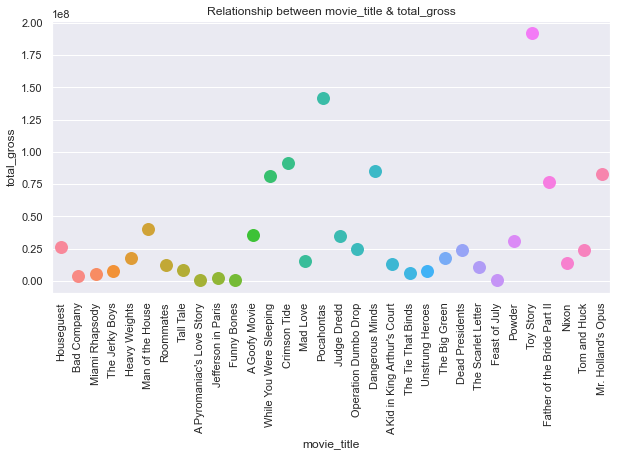

In [38]:
plt.figure(figsize=(10,5))
swarmplot=sns.swarmplot(x="movie_title",y="total_gross",data=Movies_1995, s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between movie_title & total_gross")

As we can see, Toy Story is the movie with the biggest gross in this year!

Let’s analyze the year 1994 whose is the second year with the biggest number of movies produced:

In [39]:
Movies_1994 = df[(df['year'] == 1994)]
Movies_1994.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,year
165,The Air Up There,1994-01-07,Comedy,PG,20782439,42940186,1994
166,Cabin Boy,1994-01-07,Comedy,PG-13,3469493,7168577,1994
167,Iron Will,1994-01-14,Drama,PG,20623071,42610902,1994
168,Red Rock West,1994-01-28,NaN,R,2502551,5170709,1994
169,Blank Check,1994-02-11,Comedy,PG,30573770,63170804,1994


Analyzing the genres produced in this year:

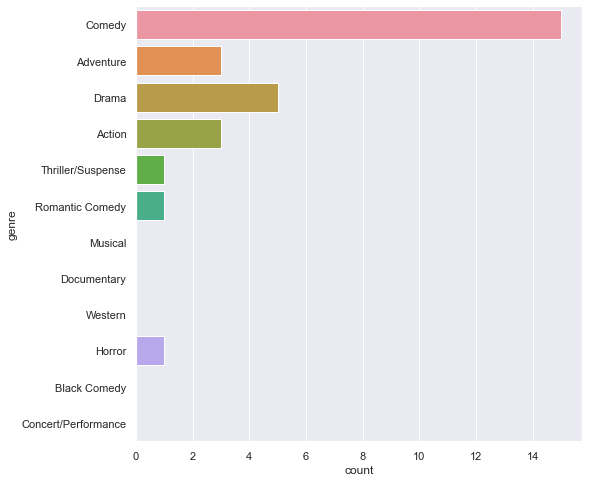

In [40]:
plt.figure(figsize=(8,8))
sns.countplot(y='genre', data=Movies_1994, order=df["genre"].value_counts().index)
plt.show()


Comedy was the genre more produced in 1994.


Analyzing grossing vs movie in 1994:

Text(0.5, 1.0, 'Relationship between movie_title & total_gross')

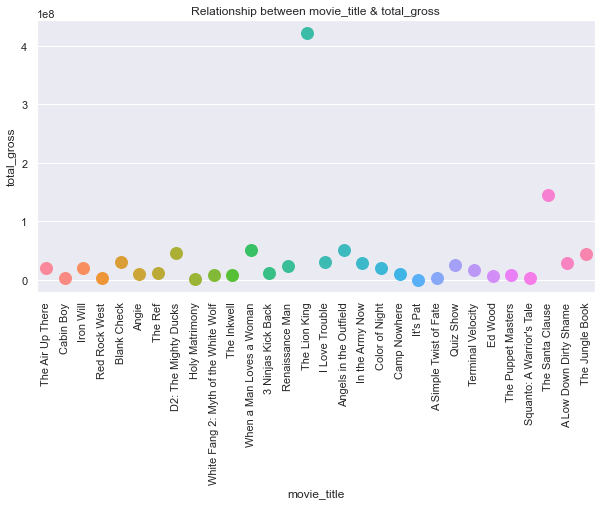

In [41]:
plt.figure(figsize=(10,5))
swarmplot=sns.swarmplot(x="movie_title",y="total_gross",data=Movies_1994, s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between movie_title & total_gross")

As we can see, The Lion King is the movie with the highest grossing in 1994. In particular, it is one of my favorite Disney movie!

Now, let’s analyze the top grossing movies per year!

In [42]:
Top_Gross = df[(df['total_gross'] > 172000000)]

Note: This number is taken by the boxplot grahn. Is it when starts the outliers.

Let’s analyze the genres from this movies:

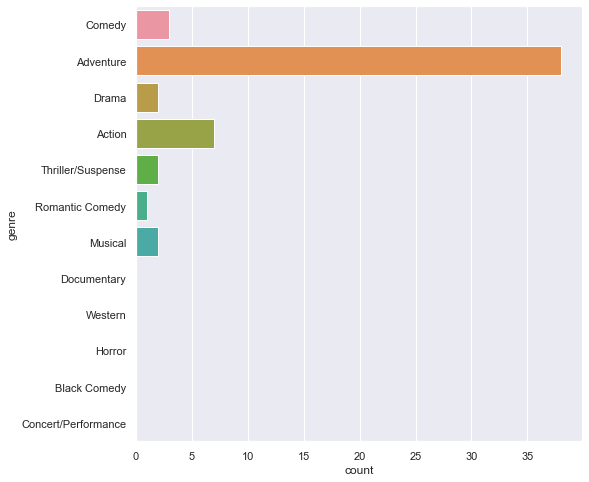

In [43]:
plt.figure(figsize=(8,8))
sns.countplot(y='genre', data=Top_Gross, order=df["genre"].value_counts().index)
plt.show()


As we saw before, the adventure genre is in the best grossing Disney movies.


let’s analyze what movies are on this top grossing:

Text(0.5, 1.0, 'Relationship between movie_title & total_gross')

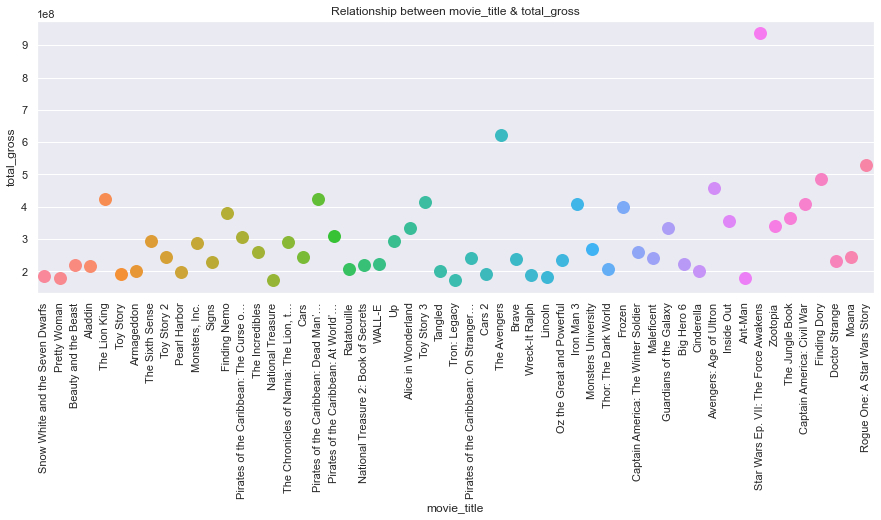

In [44]:
plt.figure(figsize=(15,5))
swarmplot=sns.swarmplot(x="movie_title",y="total_gross",data=Top_Gross, s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between movie_title & total_gross")

In this graph we can see the highest grossing Disney Animated Movies between 1940 and 2016!

#### Top three highest-grossing Disney movies are:

    Star Wars: Episode VII — The Force Awakens

        The Avengers

        Rogue One: A Star Wars Story

Analyzing the years with the highest grossing of all time:

Text(0.5, 1.0, 'Relationship between movie_title & total_gross')

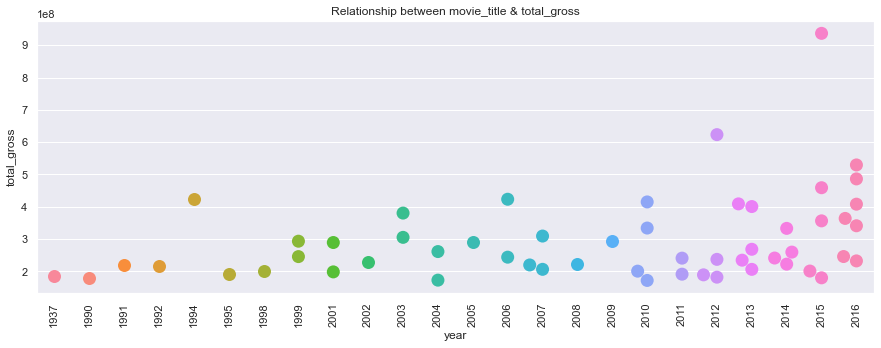

In [45]:
plt.figure(figsize=(15,5))
swarmplot=sns.swarmplot(x="year",y="total_gross",data=Top_Gross, s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between movie_title & total_gross")

Look at the graph, that analysis conclud that the 90’s was a new age for Disney! The grossing begin to be much higher than another decades. And it was in the end of the 80’s when Pixar was created (1989), that can contributed with the highest grossing throw the years.

#### Analyzing genres per decade:

Let’s create a dataframe to count genres per year:

In [46]:
df_Genre = df.groupby(['year', 'genre'], as_index=False).agg({"movie_title": "count"}).sort_values(by='genre', ascending=False)
df_Genre.head()

,year,genre,movie_title
139,2003,Western,1
87,1995,Western,1
121,2000,Western,1
147,2004,Western,2
200,2013,Western,1


Let’s separte the years by decade to a better visualization:

In [49]:
df_Genre['decade'] = 0
df_Genre.loc[df_Genre['year'] < 1940, 'decade'] = '30s'
df_Genre.loc[(df_Genre['year'] >= 1940) & (df_Genre['year'] < 1950), 'decade'] = '40s'
df_Genre.loc[(df_Genre['year'] >= 1950) & (df_Genre['year'] < 1960), 'decade'] = '50s'
df_Genre.loc[(df_Genre['year'] >= 1960) & (df_Genre['year'] < 1970), 'decade'] = '60s'
df_Genre.loc[(df_Genre['year'] >= 1970) & (df_Genre['year'] < 1980), 'decade'] = '70s'
df_Genre.loc[(df_Genre['year'] >= 1980) & (df_Genre['year'] < 1990), 'decade'] = '80s'
df_Genre.loc[(df_Genre['year'] >= 1990) & (df_Genre['year'] < 2000), 'decade'] = '90s'
df_Genre.loc[(df_Genre['year'] >= 2000) & (df_Genre['year'] < 2010), 'decade'] = '2000s'
df_Genre.loc[(df_Genre['year'] >= 2010) & (df_Genre['year'] <= 2016), 'decade'] = '2010s'

Ploting genres per decade:

<AxesSubplot:xlabel='decade'>

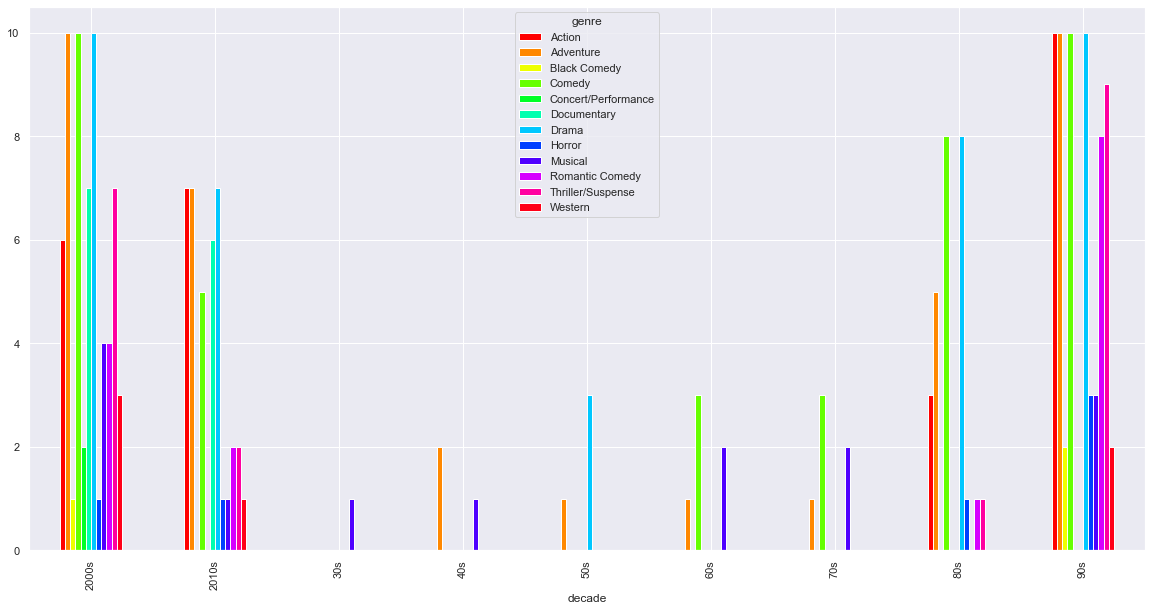

In [50]:
df_Genre.groupby(['decade', 'genre']).size().unstack().plot.bar(colormap='hsv', figsize=(20, 10))

Throw the years we can see that Disney included many type of genres. You can see that Adventure, Comedy, Action and Drama had a big grow!